In [3]:
from linear_regression import LimeAudioExplainer

In [4]:
filename = '-HWygXWSNRA'
output_dir = '/home/cbolanos/experiments/audioset_audios_eval/'
mask_percentage = 0.1
window_size = 3
id_to_explain = 353

In [9]:
filename = '-JJmkQYZA-4'
output_dir = '/home/cbolanos/experiments/audioset_audios_eval/'
mask_percentage = 0.4
window_size = 6
id_to_explain = 98

In [10]:
lime_analyzer = LimeAudioExplainer(
    path=f'{output_dir}/{filename}/scores_data_all_masked_p{mask_percentage}_m{window_size}.json',
    verbose=False,
    absolute_feature_sort=False
)

# Get coefficients
importances_lime = lime_analyzer.explain_instance(
    label_to_explain=id_to_explain).get_feature_importances(label=id_to_explain)

In [11]:
importances_lime.keys()

dict_keys(['coefficients', 'p_values', 'local_pred'])

In [9]:
importances_lime['alpha']

1e-07

In [24]:
import json

with open(f'/home/cbolanos/experiments/audioset_audios_eval/-HWygXWSNRA/ft_Accelerating, revving, vroom_p0.15_m1.json', 'r') as f:
    data = json.load(f)


In [25]:
data['importance_scores']['linear_regression']['masked']['values'].keys()

dict_keys(['coefficients', 'p_values', 'local_pred'])

ValueError: x and y must have same first dimension, but have shapes (100,) and (99,)

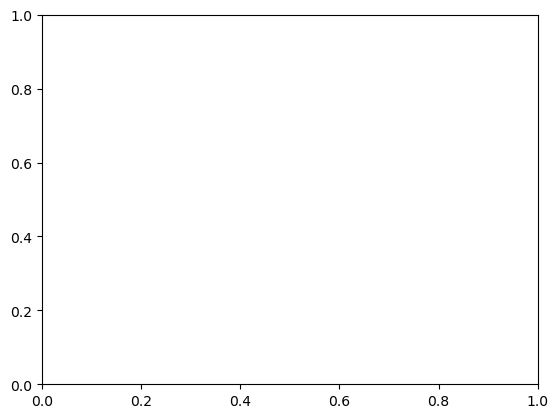

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import json

max_time = 10001
coefficients = importances_lime['coefficients']
tick_interval = 100  # ms
time_ms = np.arange(0, max_time-100, tick_interval)

# Plot on corresponding subplot
plt.plot(time_ms, coefficients)
plt.plot(time_ms, data['importance_scores']['linear_regression']['masked']['values']['coefficients'])


In [19]:
data.keys()

AttributeError: 'str' object has no attribute 'keys'

99
99
99
99
99
99
99
99
99
99
99
99


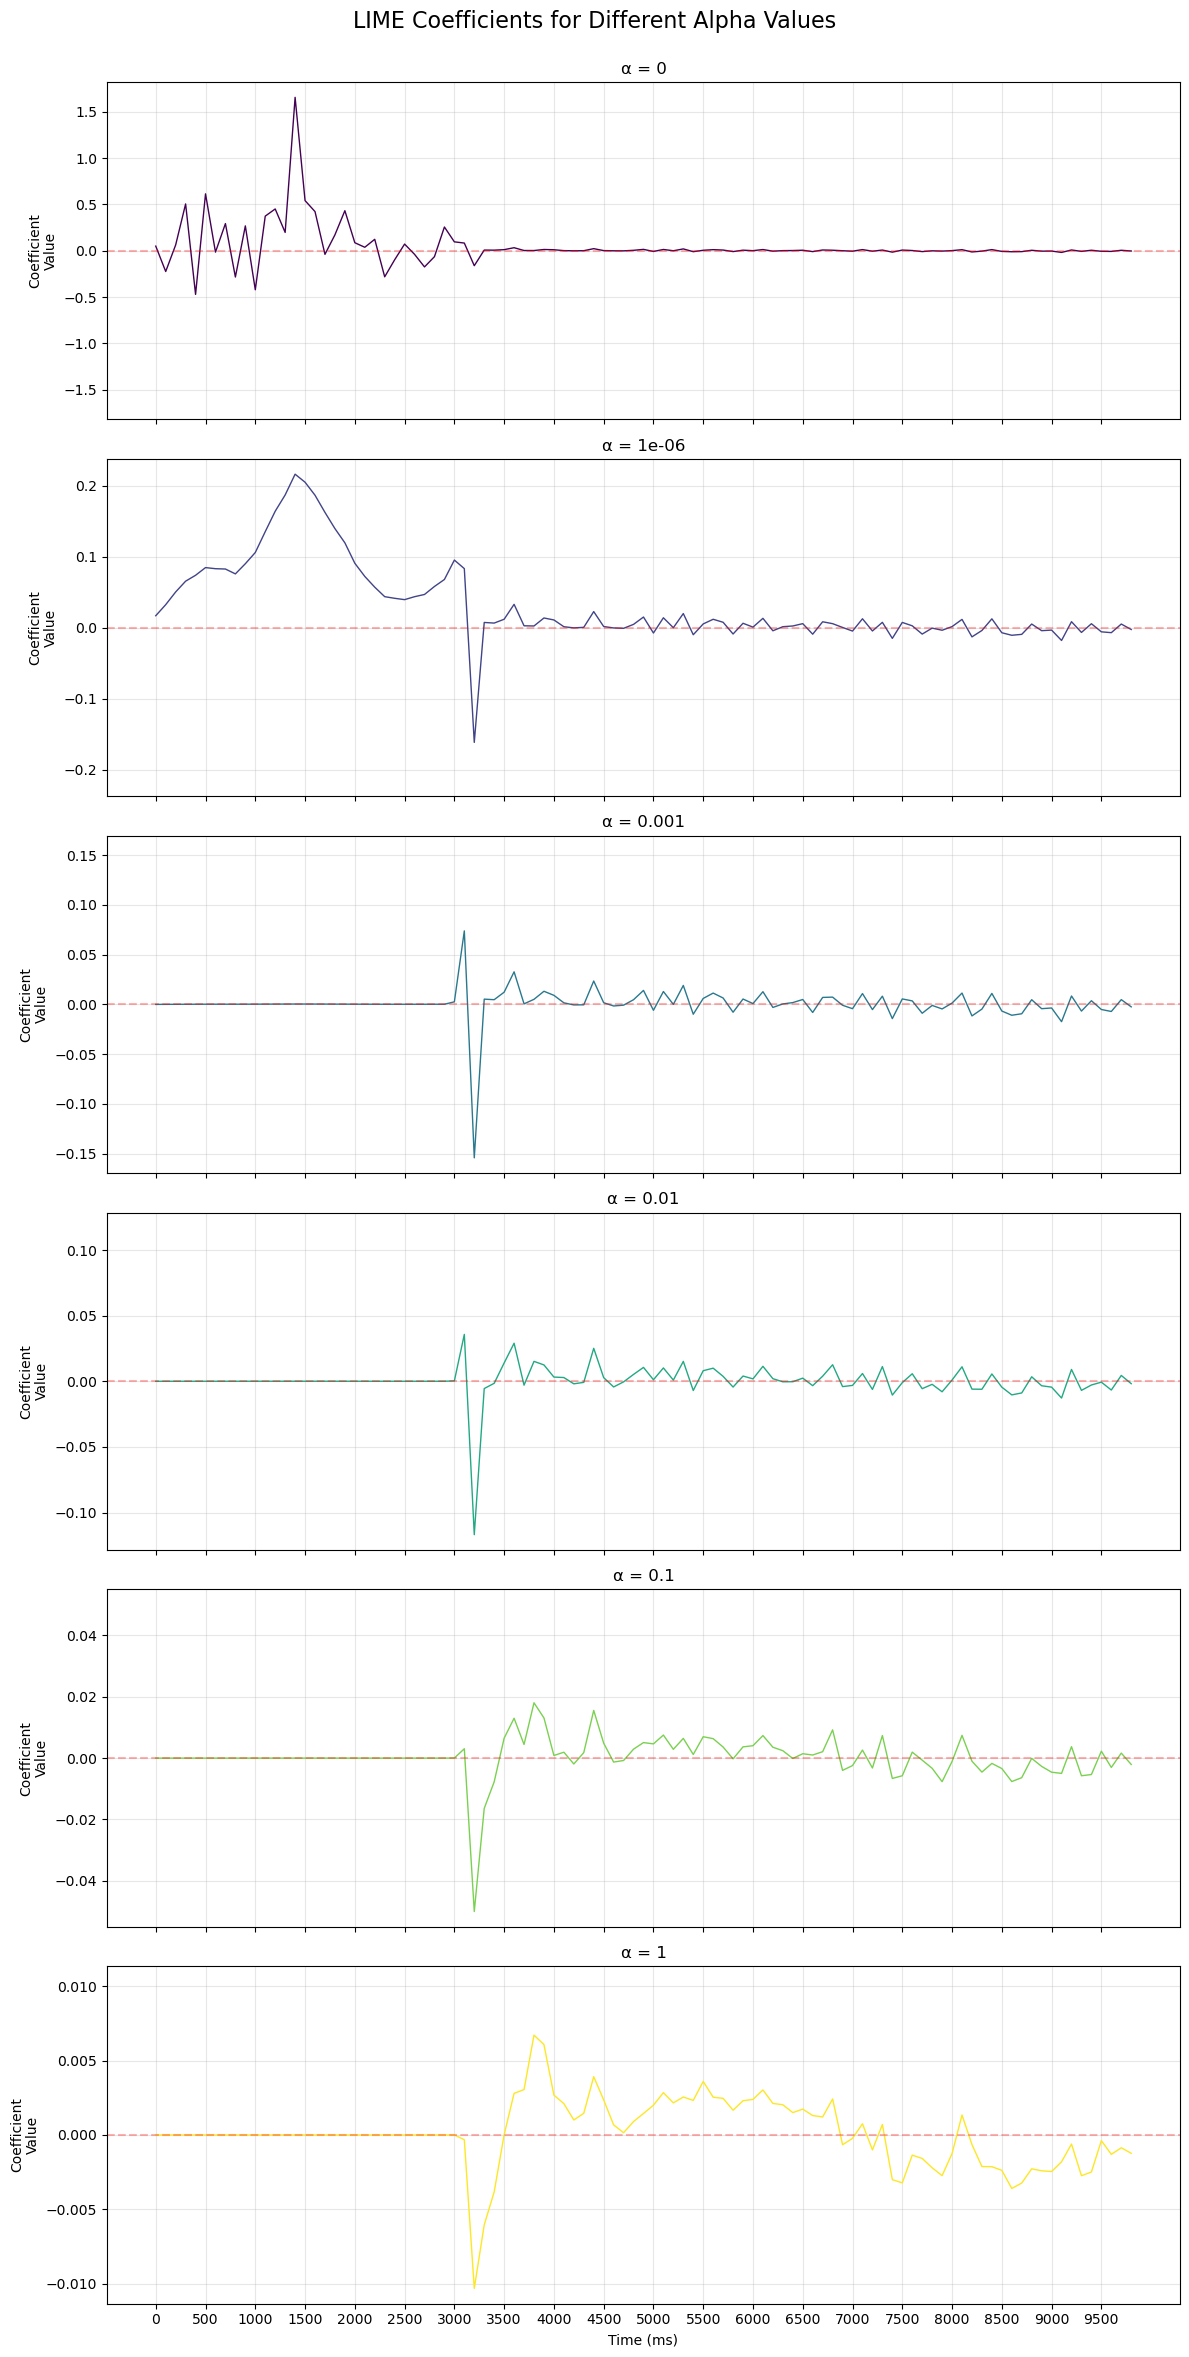

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_lime_coefficients_multiple_alphas(output_dir, filename, id_to_explain, 
                                         alphas=[0.01, 0.1, 1.0, 10.0],
                                         mask_percentage=0.4, window_size=6,
                                         sample_rate=16000):
    """
    Plot LIME coefficients for different alpha values
    
    Args:
        output_dir: Directory containing the data
        filename: Name of the file
        id_to_explain: Label ID to explain
        alphas: List of alpha values to compare
        mask_percentage: Mask percentage used
        window_size: Window size used
        sample_rate: Audio sample rate in Hz
    """
    # Create figure
    fig, axes = plt.subplots(len(alphas), 1, figsize=(12, 4*len(alphas)), sharex=True)
    fig.suptitle('LIME Coefficients for Different Alpha Values', fontsize=16)
    
    # Color map for different alpha values
    colors = plt.cm.viridis(np.linspace(0, 1, len(alphas)))
    
    for idx, alpha in enumerate(alphas):
        # Create LIME analyzer
        lime_analyzer = LimeAudioExplainer(
            path=f'{output_dir}/{filename}/scores_data_all_masked_p{mask_percentage}_m{window_size}.json',
            verbose=False,
            absolute_feature_sort=False
        )
        
        # Get coefficients
        importances_lime = lime_analyzer.explain_instance(
            label_to_explain=id_to_explain, 
            alpha=alpha
        ).get_feature_importances(label=id_to_explain)
        max_time = 10000
        coefficients = importances_lime['coefficients']
        tick_interval = 100  # ms
        time_ms = np.arange(0, max_time-100, tick_interval)

        # Plot on corresponding subplot
        ax = axes[idx]
        ax.plot(time_ms, coefficients, color=colors[idx], linewidth=1)
        
        # Add horizontal line at y=0
        ax.axhline(y=0, color='r', linestyle='--', alpha=0.3)
        
        # Customize subplot
        ax.grid(True, alpha=0.3)
        ax.set_ylabel('Coefficient\nValue')
        ax.set_title(f'α = {alpha}')
        
        # Add y-axis limits that are symmetric around 0
        max_abs_val = max(abs(np.min(coefficients)), abs(np.max(coefficients)))
        ax.set_ylim(-max_abs_val*1.1, max_abs_val*1.1)
        
    # Customize x-axis (only for bottom subplot)
    axes[-1].set_xlabel('Time (ms)')
    
    # Set x-axis ticks every 100ms

    ticks = np.arange(0, max_time-100, 500)
    axes[-1].set_xticks(ticks)
    
    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)  # Make room for suptitle
    
    return plt

# Example usage
if __name__ == "__main__":
    alphas = [0, 0.000001, 0.001, 0.01, 0.1, 1]
    plot = plot_lime_coefficients_multiple_alphas(
        output_dir=output_dir,
        filename=filename,
        id_to_explain=98,
        alphas=alphas
    )
    plt.show()

99
99
99
99
99
99
99
99
99
99
99
99


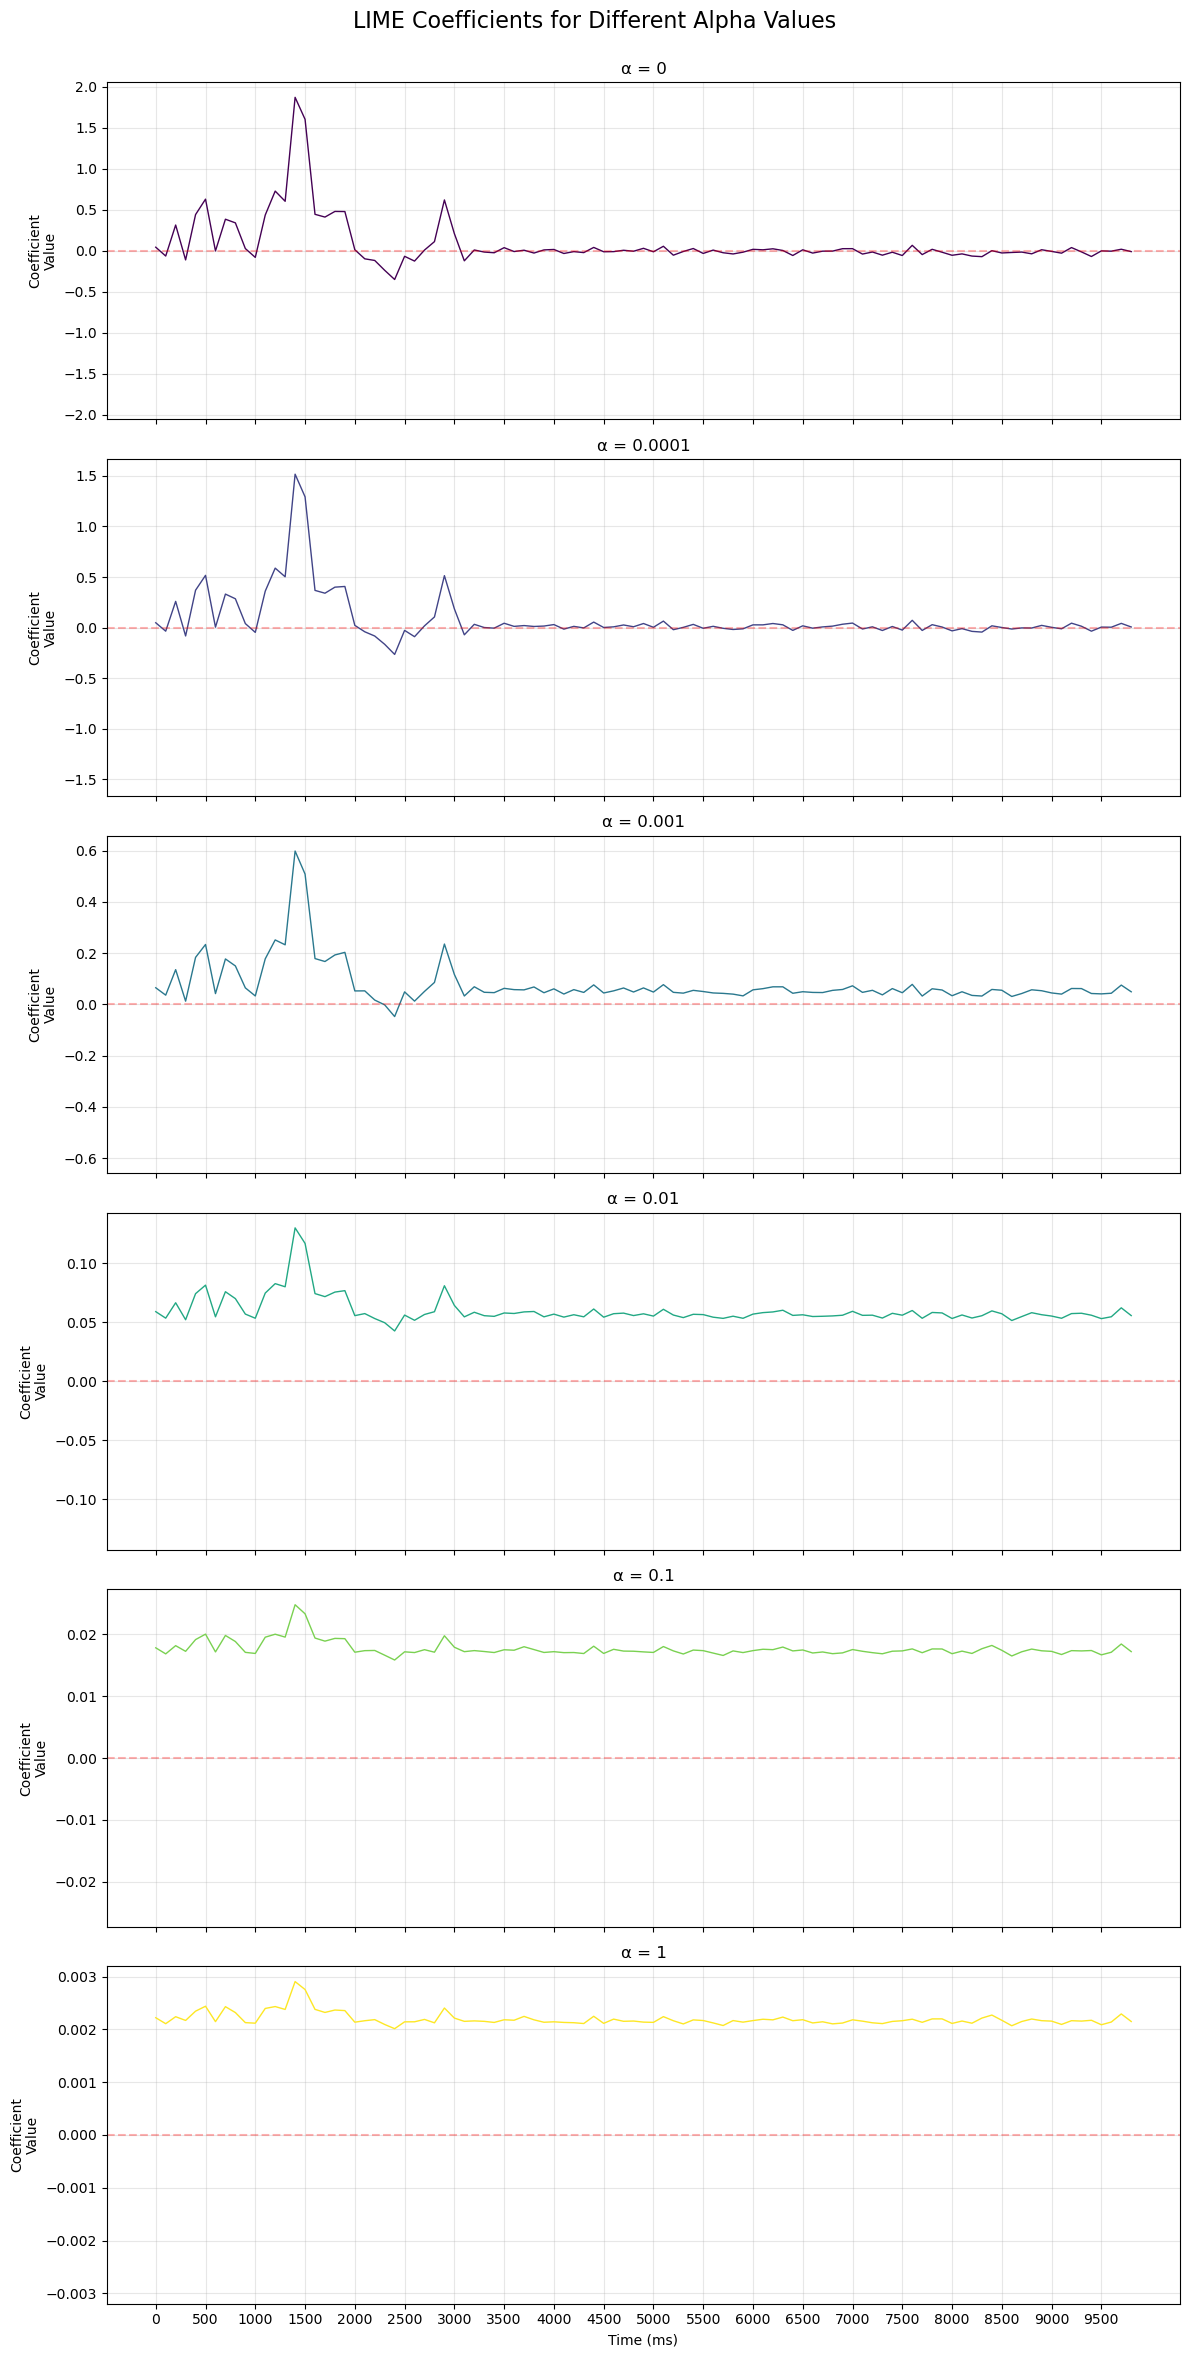

In [38]:
# Example usage
if __name__ == "__main__":
    alphas = [0, 0.0001, 0.001, 0.01, 0.1, 1]
    plot = plot_lime_coefficients_multiple_alphas(
        output_dir=output_dir,
        filename=filename,
        id_to_explain=98,
        window_size=1,
        mask_percentage=0.4,
        alphas=alphas
    )
    plt.show()

In [4]:
lime_analyzer = LimeAudioExplainer(
    path=f'{output_dir}/{filename}/scores_data_all_masked_p{mask_percentage}_m{window_size}.json',
    verbose=False,
    absolute_feature_sort=False
)

importances_lime = lime_analyzer.explain_instance(
    label_to_explain=id_to_explain, alpha=0.1
).get_feature_importances(label=id_to_explain)

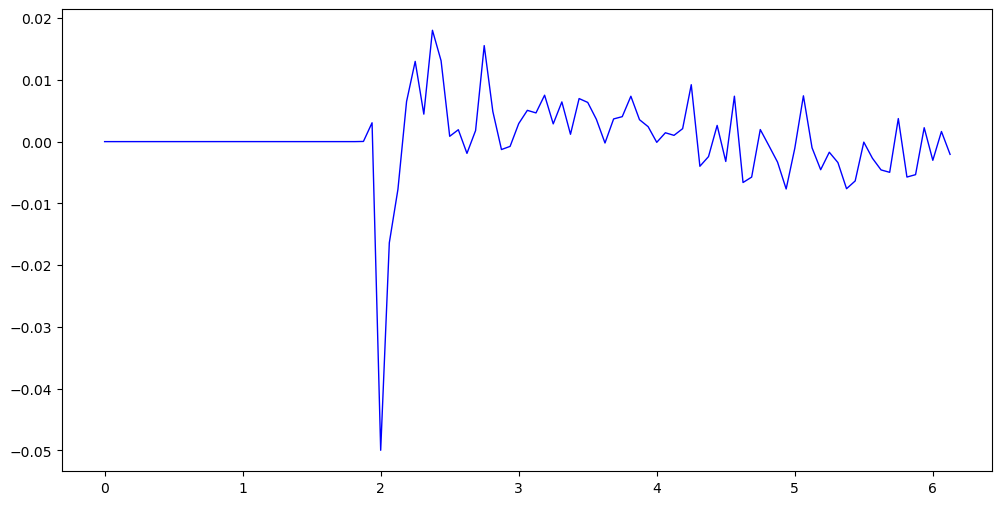

In [8]:
import matplotlib.pyplot as plt
sample_rate = 16000
coefficients = importances_lime['coefficients']
time_ms = np.arange(len(coefficients)) * (1000/sample_rate)

# Create figure
plt.figure(figsize=(12, 6))

# Plot coefficients
plt.plot(time_ms, coefficients, 'b-', linewidth=1)